In [87]:
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

from fredapi.version import version as __version__
from fredapi.fred import Fred

In [4]:
# Import the Fred API key
from api_keys import fred_api_key

In [5]:
# Create the Fred object
fred = Fred(fred_api_key)

In [33]:
fred.get_series('GDP')

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2021-10-01    24349.121
2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
2022-10-01    26137.992
Length: 308, dtype: float64

In [27]:
fred.get_series(
    series_id='GDP',
    observation_start='2003-02-01',
    observation_end='2023-02-01',
    units='pc1'
    )

2003-01-01     3.62247
2003-04-01     3.90638
2003-07-01     5.30432
2003-10-01     6.42594
2004-01-01     6.70583
                ...   
2021-10-01    12.18360
2022-01-01    10.87499
2022-04-01     9.55243
2022-07-01     9.22922
2022-10-01     7.34676
Length: 80, dtype: float64

<AxesSubplot:>

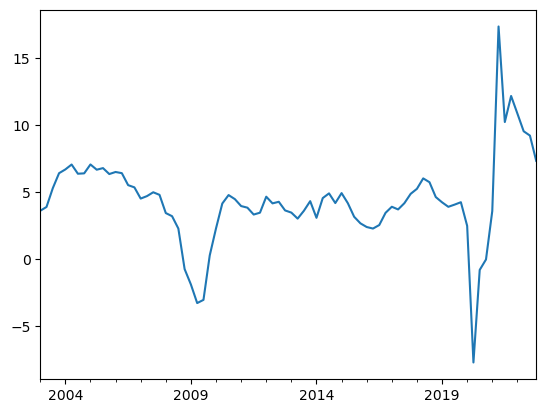

In [34]:
GDP = fred.get_series(
    series_id='GDP',
    observation_start='2003-02-01',
    observation_end='2023-02-01',
    units='pc1'
    )
GDP.name = 'GDP'
GDP.plot()

In [35]:
gdp_df = pd.DataFrame (GDP)
gdp_df

,GDP
2003-01-01,3.62247
2003-04-01,3.90638
2003-07-01,5.30432
2003-10-01,6.42594
2004-01-01,6.70583
...,...
2021-10-01,12.18360
2022-01-01,10.87499
2022-04-01,9.55243
2022-07-01,9.22922


In [31]:
fred.get_series('FEDFUNDS')

1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.07
1954-10-01    0.85
1954-11-01    0.83
              ... 
2022-11-01    3.78
2022-12-01    4.10
2023-01-01    4.33
2023-02-01    4.57
2023-03-01    4.65
Length: 825, dtype: float64

In [7]:
fred.get_series(
    series_id='FEDFUNDS',
    observation_start='2003-02-01',
    observation_end='2023-02-01',
    units='lin'
    )

2003-02-01    1.26
2003-03-01    1.25
2003-04-01    1.26
2003-05-01    1.26
2003-06-01    1.22
              ... 
2022-10-01    3.08
2022-11-01    3.78
2022-12-01    4.10
2023-01-01    4.33
2023-02-01    4.57
Length: 241, dtype: float64

<AxesSubplot:>

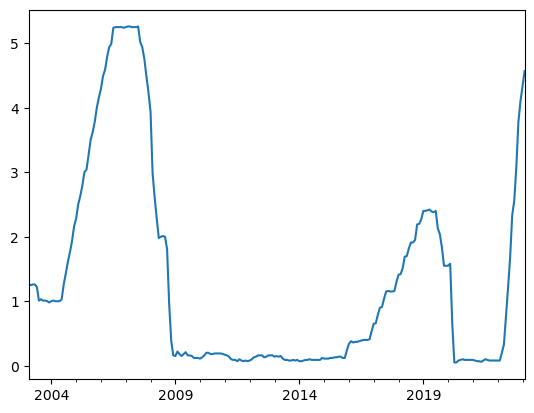

In [36]:
ff = fred.get_series(
    series_id='FEDFUNDS',
    observation_start='2003-02-01',
    observation_end='2023-02-01',
    units='lin'
    )
ff.name = 'FedFundsRate'
ff.plot()


In [23]:
ff_df = pd.DataFrame (ff)
ff_df

,FedFundsRate
2003-04-01,1.26
2003-05-01,1.26
2003-06-01,1.22
2003-07-01,1.01
2003-08-01,1.03
...,...
2022-11-01,3.78
2022-12-01,4.10
2023-01-01,4.33
2023-02-01,4.57


In [43]:
join_df =ff_df.join(gdp_df) 
join_df

,FedFundsRate,GDP
2003-04-01,1.26,3.90638
2003-05-01,1.26,NaN
2003-06-01,1.22,NaN
2003-07-01,1.01,5.30432
2003-08-01,1.03,NaN
...,...,...
2022-11-01,3.78,NaN
2022-12-01,4.10,NaN
2023-01-01,4.33,NaN
2023-02-01,4.57,NaN


In [44]:
dfresult = join_df.dropna()
print(dfresult)

            FedFundsRate       GDP
2003-04-01          1.26   3.90638
2003-07-01          1.01   5.30432
2003-10-01          1.01   6.42594
2004-01-01          1.00   6.70583
2004-04-01          1.00   7.07209
...                  ...       ...
2021-10-01          0.08  12.18360
2022-01-01          0.08  10.87499
2022-04-01          0.33   9.55243
2022-07-01          1.68   9.22922
2022-10-01          3.08   7.34676

[79 rows x 2 columns]


In [20]:
ffyearly_df = pd.DataFrame (ff)
ffyearly_df

,FedFundsRate
2003-03-01,1.25
2003-04-01,1.26
2003-05-01,1.26
2003-06-01,1.22
2003-07-01,1.01
...,...
2022-11-01,3.78
2022-12-01,4.10
2023-01-01,4.33
2023-02-01,4.57
